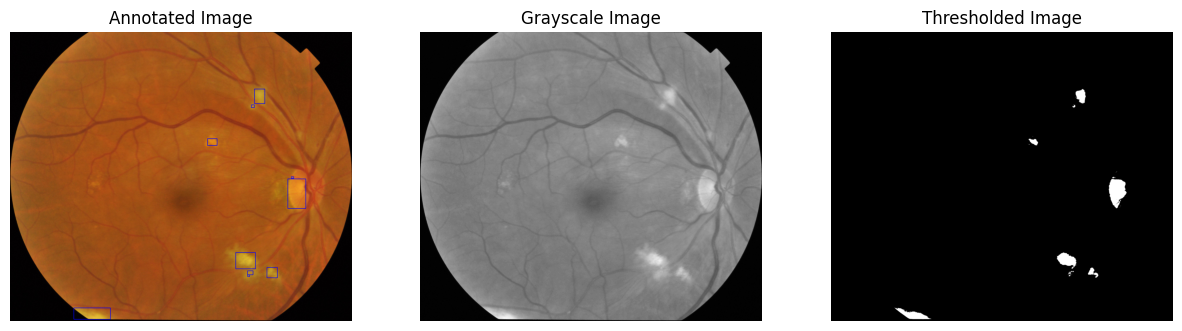

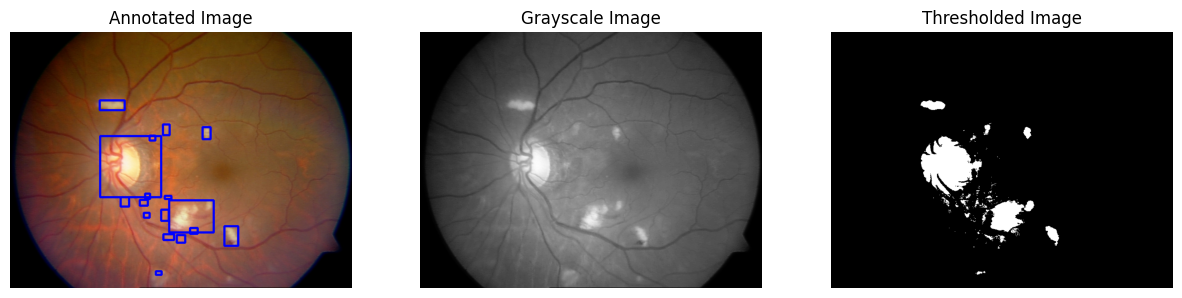

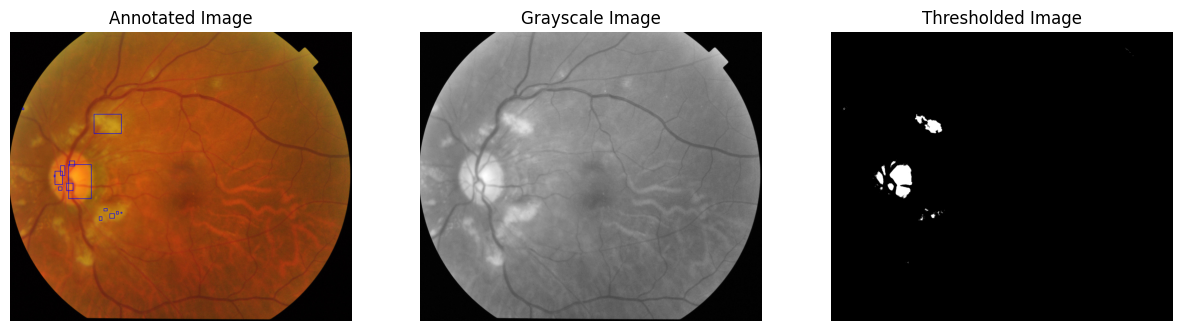

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Load images
image_paths = ["1.JPG", "2.JPG", "3.JPG"]  
output_folder = "./annotated_images1"

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

def annotate_image(image_path):

    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) #turn it into grayscale
    
    # Threshold
    _, thresh = cv2.threshold(gray, 140, 255, cv2.THRESH_BINARY)  # i finetuned the threshold value manually, until i got 140 as the best result so far
    
    # Find contours
    contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Draw bounding boxes for the detected white regions (anomalies)
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        
        # this condition is to skip the areas that are too small than 100 pixel^2
        if w * h < 100:
            continue
        
        # Draw rectangles
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 3)
    
    return img, gray, thresh #so we return the img with the drawn rectangles, the grayscaled img and the anomalies alone

#results and tests
for image_path in image_paths:
    annotated_img, gray_img, thresh_img = annotate_image(image_path)
    
    # Save
    output_path = f"{output_folder}/{image_path.split('/')[-1]}"
    cv2.imwrite(output_path, annotated_img)
    # show the result
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
    plt.title("Annotated Image")
    plt.axis("off")
    
    plt.subplot(1, 3, 2)
    plt.imshow(gray_img, cmap="gray")
    plt.title("Grayscale Image")
    plt.axis("off")
    
    plt.subplot(1, 3, 3)
    plt.imshow(thresh_img, cmap="gray")
    plt.title("Thresholded Image")
    plt.axis("off")
    
    plt.show()
